### Scenario 3
#### Construction year 'Wind park 1' = Construction year 'Wind park 2' = Construction year 'Artificial Energy Island'
This notebook shows the basics of Scenario 3 as suggested by Wouter van den Haak:
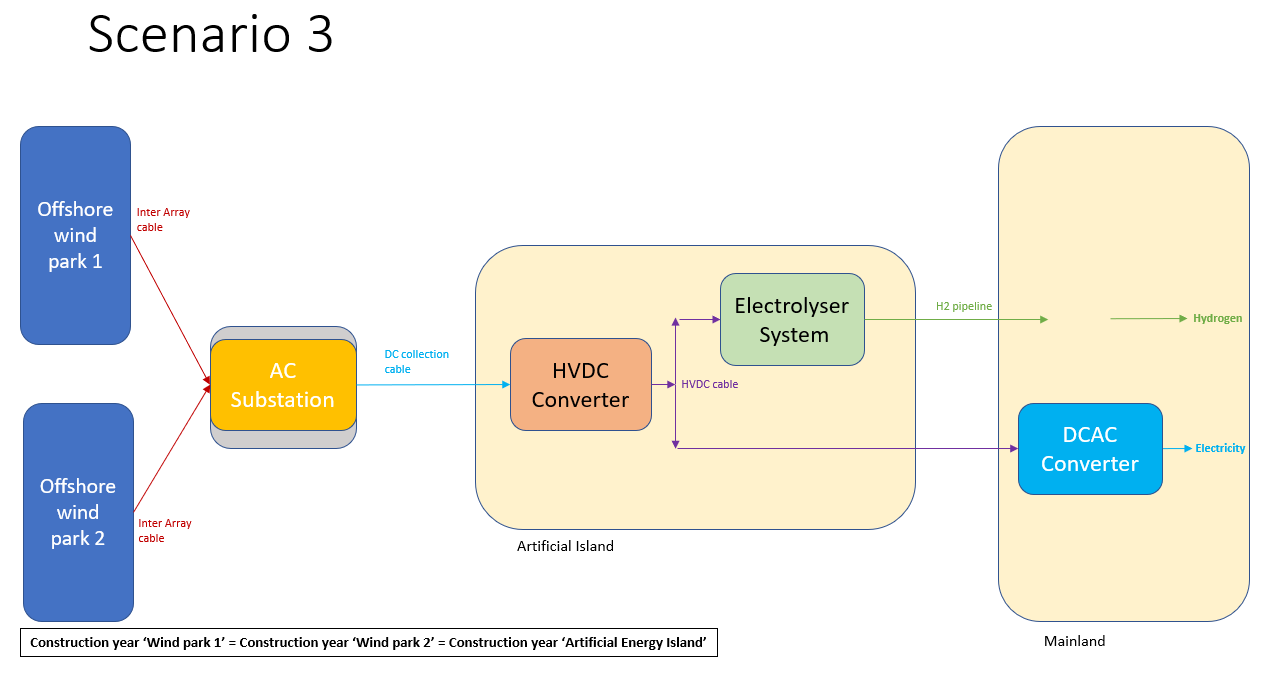

#### 0. Import basic methods (a.o. from source2.py)

In [974]:
from source2 import *
import numpy as np
BOLD = "\033[1m"

In [975]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
#### 1.1 General input

In [976]:
#General
WACC = 0.0984

#Time input
startyear = 2030
endyear = startyear + 29

#Escalation
escalation_base_year = 2030 
lifecycle=30               
escalation_rate=0.02    

#Distances
distance_windpark = 180_000 #meter (distance windpark from shore)
distance_island_shore = 150_000 #meter
distance_DC_collection = distance_windpark - distance_island_shore #meter

#Windpark
capacity_windpark1 = 6000 #MW
capacity_windpark2 = 6000 #MW

#Dedicated energy for electrolysis / electricity
dedicated_electrolyser_energy = 0.3
dedicated_DCAC_energy = (1 - dedicated_electrolyser_energy)

#Efficiency factors
inter_array_cable_efficiency = 0.99 
DC_collection_cable_efficiency = 0.95
HVDC_cable_efficiency = 1 - (0.01 * (0.00005 *(distance_island_shore) + 4))
H2_pipeline_efficiency = 0.95
DCAC_efficiency = 0.9

#Electricity to hydrogen conversion
kWh_to_kg = 50 #kWh/kg hydrogen

#Energy prices
electricity_price = 0.18  # 0.18 EU/kWh
hydrogen_price = 6 # 6 EU / kg 

#### 1.2 Element data
We are including the following elements:

##### 1.2.1 Foundations and cables

In [977]:
#Wind park 1
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
foundation_data['unit'] = capacity_windpark1
display(foundation_data)

#Wind park 2
foundation2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation2_data['depreciation_rate']=1/foundation2_data['economic_lifetime']
foundation2_data['unit'] = capacity_windpark2
display(foundation2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

In [978]:
#Wind park 1
Foundation = Object(**foundation_data)

#Wind park 2
Foundation2 = Object(**foundation2_data)

In [979]:
#Wind park 1
Foundation.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

#Wind park 2
Foundation2.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.2.2 Turbines

In [980]:
#Wind park 1
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
turbine_data['unit']=capacity_windpark1
display(turbine_data)

#Wind park 2
turbine2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine2_data['depreciation_rate']=1/turbine2_data['economic_lifetime']
turbine2_data['unit']=capacity_windpark2
display(turbine2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [981]:
#Wind park 1
Turbine = Object(**turbine_data)

#Wind park 2
Turbine2 = Object(**turbine2_data)

In [982]:
#Wind park 1
Turbine.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

#Wind park 2
Turbine2.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.3.1 AC Substation

In [983]:
#AC Substation 1
AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
AC_substation_data['unit'] = turbine_data['unit'] + turbine2_data['unit']
display(AC_substation_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 185000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 12000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [984]:
#AC Substation 1
ACStation = Object(**AC_substation_data)

In [985]:
#AC Substation 1
ACStation.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.3.2 DC Collection Cable

In [986]:
#DC Collection Cable 1
DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
DC_collection_cable_data['unit'] = distance_DC_collection
display(DC_collection_cable_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 2000.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 30000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [987]:
#DC Collection Cable 1
DCCollectionCable = Object(**DC_collection_cable_data)

In [988]:
#DC Collection Cable 1
DCCollectionCable.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.4.1 HVDC Converter

In [989]:
#HVDC Converter 1
HVDC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Converter')
HVDC_converter_data['depreciation_rate']=1/HVDC_converter_data['economic_lifetime']
HVDC_converter_data['unit'] = turbine_data['unit'] + turbine2_data['unit']
display(HVDC_converter_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Converter',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 472500.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 12000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [990]:
#HVDC Converter 1
HVDCConverter = Object(**HVDC_converter_data)

In [991]:
#HVDC Converter 1
HVDCConverter.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.4.2 HVDC Cable

In [992]:
#HVDC Cable 1
HVDC_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable_data['depreciation_rate']=1/HVDC_cable_data['economic_lifetime']
HVDC_cable_data['unit'] = distance_island_shore * dedicated_DCAC_energy
HVDC_cable_data['capex_per_unit'] = 3800 
display(HVDC_cable_data)

#HVDC Cable 2
HVDC_cable2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable2_data['depreciation_rate']=1/HVDC_cable2_data['economic_lifetime']
HVDC_cable2_data['unit'] = distance_island_shore * dedicated_DCAC_energy
HVDC_cable2_data['capex_per_unit'] = 3800 
display(HVDC_cable2_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 3800,
 'capex_per_unit_units': 'EUR / m',
 'unit': 105000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 3800,
 'capex_per_unit_units': 'EUR / m',
 'unit': 105000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [993]:
#HVDC Cable 1
HVDCCable = Object(**HVDC_cable_data)

#HVDC Cable 2
HVDCCable2 = Object(**HVDC_cable2_data)

In [994]:
#HVDC Cable 1
HVDCCable.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

#HVDC Cable 2
HVDCCable2.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.1 Electrolyser

In [995]:
#Electrolyser 1
Electrolyser_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Electrolyser')
Electrolyser_data['depreciation_rate']=1/Electrolyser_data['economic_lifetime']
Electrolyser_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Electrolyser_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Electrolyser',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 535000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [996]:
#Electrolyser 1
Electrolyser = Object(**Electrolyser_data)

In [997]:
#Electrolyser 1
Electrolyser.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.2 Desalination Unit

In [998]:
#Desalination Unit 1
Desalination_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Desalination unit')
Desalination_unit_data['depreciation_rate']=1/Desalination_unit_data['economic_lifetime']
Desalination_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Desalination_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Desalination unit',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 3900.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [999]:
#Desalination Unit 1
DesalinationUnit = Object(**Desalination_unit_data)

In [1000]:
#Desalination Unit 1
DesalinationUnit.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.3 Compressor Unit

In [1001]:
#Compressor Unit 1
Compressor_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor unit')
Compressor_unit_data['depreciation_rate']=1/Compressor_unit_data['economic_lifetime']
Compressor_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Compressor_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor unit',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 153000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1002]:
#Compressor Unit 1
CompressorUnit = Object(**Compressor_unit_data)

In [1003]:
#Compressor Unit 1
CompressorUnit.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.4 Storage Unit

In [1004]:
#Storage Unit 1
Storage_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Storage unit')
Storage_unit_data['depreciation_rate']=1/Storage_unit_data['economic_lifetime']
Storage_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Storage_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Storage unit',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 290000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1005]:
#Storage Unit 1
StorageUnit = Object(**Storage_unit_data)

In [1006]:
#Storage Unit 1
StorageUnit.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.5 Compressor after storage

In [1007]:
#Compressor after storage 1
Compressor_after_storage_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor after storage')
Compressor_after_storage_data['depreciation_rate']=1/Compressor_after_storage_data['economic_lifetime']
Compressor_after_storage_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Compressor_after_storage_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor after storage',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 10200.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1008]:
#Compressor after storage 1
CompressorAfterStorage = Object(**Compressor_after_storage_data)

In [1009]:
#Compressor after storage 1
CompressorAfterStorage.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.6 DCAC Converter

In [1010]:
#DCAC Converter 1
DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
DCAC_converter_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_DCAC_energy
display(DCAC_converter_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 285000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 8400.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1011]:
#DCAC Converter 1
DCACConverter = Object(**DCAC_converter_data)

In [1012]:
#DCAC Converter 1
DCACConverter.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.7.1 Artificial Island

In [1013]:
Artificial_island_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Artificial island')
Artificial_island_data['depreciation_rate']=1/Artificial_island_data['economic_lifetime']
Artificial_island_data['unit']=1
Artificial_island_data['capex_per_unit']=1_410_000_000
display(Artificial_island_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Artificial island',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1410000000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 1,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1014]:
ArtificialIsland = Object(**Artificial_island_data)

In [1015]:
ArtificialIsland.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.7.2 Mainland

In [1016]:
Mainland_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Mainland')
Mainland_data['depreciation_rate']=1/Mainland_data['economic_lifetime']
Mainland_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_DCAC_energy
display(Mainland_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Mainland',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 6000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 8400.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.1,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.01,
 'residual_value': []}

In [1017]:
Mainland = Object(**Mainland_data)

In [1018]:
Mainland.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.8.1 H2 Pipeline

In [1019]:
H2_pipeline_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Transport',
                               component='H2 Pipeline')
H2_pipeline_data['depreciation_rate']=1/H2_pipeline_data['economic_lifetime']
H2_pipeline_data['unit'] = distance_island_shore * dedicated_electrolyser_energy
H2_pipeline_data['capex_per_unit'] = 1500
display(H2_pipeline_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Transport',
 'component': 'H2 Pipeline',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1500,
 'capex_per_unit_units': 'EUR / m',
 'unit': 45000.0,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': []}

In [1020]:
H2Pipeline = Object(**H2_pipeline_data)

In [1021]:
H2Pipeline.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 2. Generate combined cashflows

In [1022]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, HVDCCable2.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, Mainland.df, H2Pipeline.df])

##### 3. Calculate NPVs

In [1023]:
df_combined_npv=calculate_npv(df_combined, 2030, WACC=WACC)
display(df_combined_npv)
final_npv_sum = df_combined_npv['npv_sum'].iloc[-1]
print(final_npv_sum)

,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2030,2030,-8.482455e+09,0.000000e+00,0,-8.482455e+09,-8.482455e+09,-8.482455e+09,-8.482455e+09
2031,2031,-1.730421e+10,0.000000e+00,0,-1.730421e+10,-2.578666e+10,-1.575401e+10,-2.423647e+10
2032,2032,-1.765029e+10,0.000000e+00,0,-1.765029e+10,-4.343695e+10,-1.462955e+10,-3.886601e+10
2033,2033,0.000000e+00,-1.321614e+09,0,-1.321614e+09,-4.475857e+10,-9.972938e+08,-3.986331e+10
2034,2034,0.000000e+00,-1.348046e+09,0,-1.348046e+09,-4.610661e+10,-9.261104e+08,-4.078942e+10
2035,2035,0.000000e+00,-1.375007e+09,0,-1.375007e+09,-4.748162e+10,-8.600078e+08,-4.164942e+10
2036,2036,0.000000e+00,-1.402508e+09,0,-1.402508e+09,-4.888413e+10,-7.986234e+08,-4.244805e+10
2037,2037,0.000000e+00,-1.430558e+09,0,-1.430558e+09,-5.031469e+10,-7.416205e+08,-4.318967e+10
2038,2038,0.000000e+00,-1.459169e+09,0,-1.459169e+09,-5.177386e+10,-6.886861e+08,-4.387835e+10


-52093084293.55168


##### 4. Plots

##### 4.1. NPV Plot

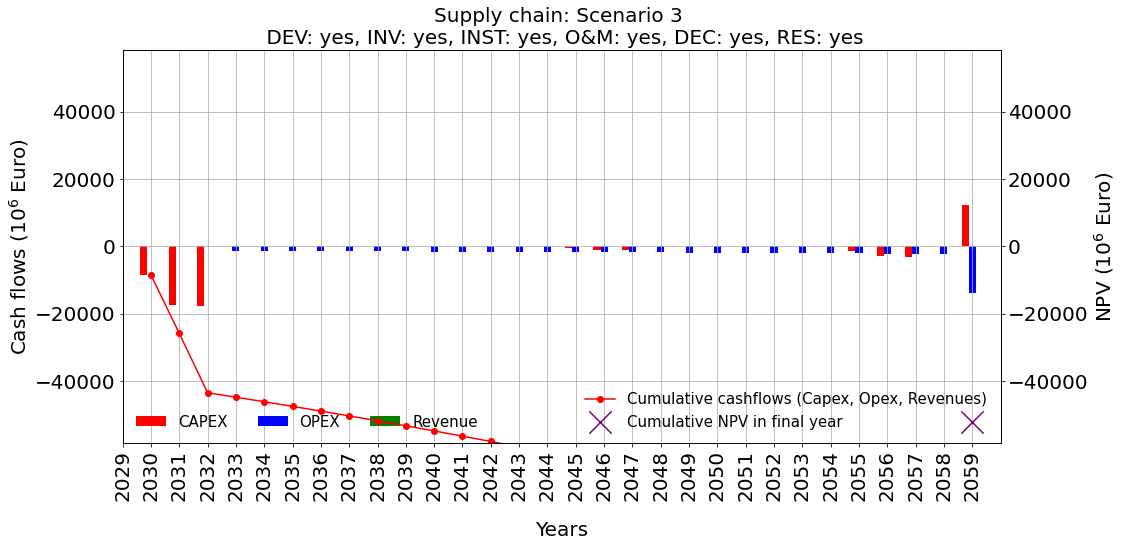

In [1024]:
# DEV: Project development costs
# INV: Investment / procurement costs
# INST: Installation / construction costs 
# O&M: Yearly variable / O&M costs 
# DEC: Decommissioning costs 
# RES: Residual value   

create_npv_plot(df_combined_npv, title='Supply chain: Scenario 3 \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

##### 4.2. Pie chart

In [1025]:
# collect the npv calculations per item (without revenues)
Foundation.df_npv = calculate_npv(Foundation.df, 2030, WACC=WACC)
Foundation2.df_npv = calculate_npv(Foundation2.df, 2030, WACC=WACC)

Turbine.df_npv = calculate_npv(Turbine.df, 2030, WACC=WACC)
Turbine2.df_npv = calculate_npv(Turbine2.df, 2030, WACC=WACC)

ACStation.df_npv = calculate_npv(ACStation.df, 2030, WACC=WACC)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2030, WACC=WACC)

HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, 2030, WACC=WACC)
HVDCCable.df_npv = calculate_npv(HVDCCable.df, 2030, WACC=WACC)
HVDCCable2.df_npv = calculate_npv(HVDCCable2.df, 2030, WACC=WACC)

Electrolyser.df_npv = calculate_npv(Electrolyser.df, 2030, WACC=WACC)
DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, 2030, WACC=WACC)
CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, 2030, WACC=WACC)
StorageUnit.df_npv = calculate_npv(StorageUnit.df, 2030, WACC=WACC)
CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, 2030, WACC=WACC)

DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2030, WACC=WACC)

ArtificialIsland.df_npv = calculate_npv(ArtificialIsland.df, 2030, WACC=WACC)
Mainland.df_npv = calculate_npv(Mainland.df, 2030, WACC=WACC)

H2Pipeline.df_npv = calculate_npv(H2Pipeline.df, 2030, WACC=WACC)

In [1026]:
# combine the values of certain items
foundation_cables_value_npv_sum = -Foundation.df_npv.npv_sum.iloc[-1] - Foundation2.df_npv.npv_sum.iloc[-1]
turbine_value_npv_sum = -Turbine.df_npv.npv_sum.iloc[-1] - Turbine2.df_npv.npv_sum.iloc[-1]
AC_substation_value_npv_sum = -ACStation.df_npv.npv_sum.iloc[-1] - DCCollectionCable.df_npv.npv_sum.iloc[-1]
hvdc_converter_value_npv_sum = -HVDCConverter.df_npv.npv_sum.iloc[-1] 
hvdc_cable_value_npv_sum = - HVDCCable.df_npv.npv_sum.iloc[-1] -HVDCCable2.df_npv.npv_sum.iloc[-1]
electrolysis_value_npv_sum = -Electrolyser.df_npv.npv_sum.iloc[-1] -DesalinationUnit.df_npv.npv_sum.iloc[-1] -CompressorUnit.df_npv.npv_sum.iloc[-1] -StorageUnit.df_npv.npv_sum.iloc[-1] -CompressorAfterStorage.df_npv.npv_sum.iloc[-1]
dcac_converter_value_npv_sum = -DCACConverter.df_npv.npv_sum.iloc[-1]
artificial_island_value_npv_sum = -ArtificialIsland.df_npv.npv_sum.iloc[-1]
mainland_value_npv_sum = -Mainland.df_npv.npv_sum.iloc[-1]
H2_pipeline_value_npv_sum = -H2Pipeline.df_npv.npv_sum.iloc[-1]

# create a new data point for each combined value
data_hydrogen_npv = [foundation_cables_value_npv_sum, turbine_value_npv_sum, AC_substation_value_npv_sum, hvdc_converter_value_npv_sum, electrolysis_value_npv_sum, artificial_island_value_npv_sum, H2_pipeline_value_npv_sum
]

data_electricity_npv = [foundation_cables_value_npv_sum, turbine_value_npv_sum, AC_substation_value_npv_sum, hvdc_converter_value_npv_sum, hvdc_cable_value_npv_sum, dcac_converter_value_npv_sum, artificial_island_value_npv_sum, mainland_value_npv_sum
]

In [1027]:
dedicated_data_hydrogen_npv = []
for item in data_hydrogen_npv:
    if item not in [electrolysis_value_npv_sum, H2_pipeline_value_npv_sum]:
        dedicated_cost = dedicated_electrolyser_energy * item
        dedicated_data_hydrogen_npv.append(dedicated_cost)
        print(f"dedicated_cost = {dedicated_electrolyser_energy} * {item} = {dedicated_cost}")

data_hydrogen = sum(dedicated_data_hydrogen_npv) + electrolysis_value_npv_sum + H2_pipeline_value_npv_sum
print(electrolysis_value_npv_sum)
print(H2_pipeline_value_npv_sum)
print(sum(dedicated_data_hydrogen_npv))
print(data_hydrogen)


dedicated_cost = 0.3 * 13736089034.532637 = 4120826710.359791
dedicated_cost = 0.3 * 17777477118.104546 = 5333243135.431363
dedicated_cost = 0.3 * 2961771387.0336566 = 888531416.1100969
dedicated_cost = 0.3 * 6740069243.2626 = 2022020772.9787798
dedicated_cost = 0.3 * 1621619702.621597 = 486485910.7864791
4890179211.897642
80238919.56265004
12851107945.666508
17821526077.126797


In [1028]:
dedicated_data_hydrogen_npv = []
for item in data_hydrogen_npv:
    if item not in [electrolysis_value_npv_sum, H2_pipeline_value_npv_sum]:
        dedicated_cost = dedicated_electrolyser_energy * item
        dedicated_data_hydrogen_npv.append(dedicated_cost)
        print("New value of cost:", dedicated_cost)

data_hydrogen = sum(dedicated_data_hydrogen_npv) + electrolysis_value_npv_sum + H2_pipeline_value_npv_sum
print(electrolysis_value_npv_sum)
print(H2_pipeline_value_npv_sum)
print(sum(dedicated_data_hydrogen_npv))
print(data_hydrogen)

dedicated_data_electricity_npv = []
for item in data_electricity_npv:
    if item not in [hvdc_cable_value_npv_sum, dcac_converter_value_npv_sum, mainland_value_npv_sum]:
        dedicated_data_electricity_npv.append(dedicated_DCAC_energy * item)

data_electricity = sum(dedicated_data_electricity_npv) + dcac_converter_value_npv_sum + mainland_value_npv_sum + hvdc_cable_value_npv_sum

New value of cost: 4120826710.359791
New value of cost: 5333243135.431363
New value of cost: 888531416.1100969
New value of cost: 2022020772.9787798
New value of cost: 486485910.7864791
4890179211.897642
80238919.56265004
12851107945.666508
17821526077.126797


In [1029]:
# prepare input for pie chart

# combine the values of certain items
foundation_cables_value = -Foundation.df_npv.cashflow_sum.iloc[-1] - Foundation2.df_npv.cashflow_sum.iloc[-1]
turbine_value = -Turbine.df_npv.cashflow_sum.iloc[-1] - Turbine2.df_npv.cashflow_sum.iloc[-1]
AC_substation_value = -ACStation.df_npv.cashflow_sum.iloc[-1] - DCCollectionCable.df_npv.cashflow_sum.iloc[-1]
hvdc_converter_value = -HVDCConverter.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1]
electrolysis_value = -Electrolyser.df_npv.cashflow_sum.iloc[-1] -DesalinationUnit.df_npv.cashflow_sum.iloc[-1] -CompressorUnit.df_npv.cashflow_sum.iloc[-1] -StorageUnit.df_npv.cashflow_sum.iloc[-1] -CompressorAfterStorage.df_npv.cashflow_sum.iloc[-1]
dcac_converter_value = -DCACConverter.df_npv.cashflow_sum.iloc[-1] 
artificial_island_value = -ArtificialIsland.df_npv.cashflow_sum.iloc[-1]
mainland_value = -Mainland.df_npv.cashflow_sum.iloc[-1]
H2_pipeline_value = -H2Pipeline.df_npv.cashflow_sum.iloc[-1]

# create a new data point for each combined value
labels = ['Foundation & cables', 'Turbine', 'AC Substation', 'HVDC Converter & cables', 'Electrolysis', 'DCAC Converter', 'Mainland', 'Artificial Island', 'H2 Pipeline']
data = [foundation_cables_value, turbine_value, AC_substation_value, hvdc_converter_value, electrolysis_value, dcac_converter_value, mainland_value, artificial_island_value, H2_pipeline_value
]


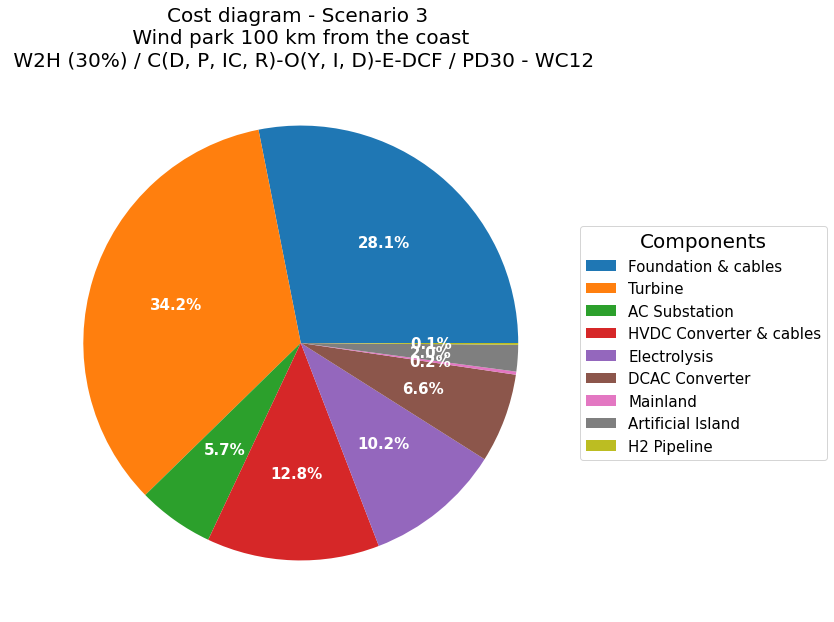

In [1030]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram - Scenario 3 \n Wind park 100 km from the coast \n W2H (30%) / C(D, P, IC, R)-O(Y, I, D)-E-DCF / PD30 - WC12", fontsize=20)

plt.show()

##### 5. Energy production + LCOE & LCOH

In [1031]:
wind_energy_production_per_year_park1 = (turbine_data['unit']) * 1000 * 4380
print('wind_energy_production_per_year_park1: {:.0f} kWh'.format(wind_energy_production_per_year_park1))
wind_energy_production_per_year_park2 = (turbine2_data['unit']) * 1000 * 4380
print('wind_energy_production_per_year_park2: {:.0f} kWh'.format(wind_energy_production_per_year_park2))

total_wind_energy_production_per_year = []
for year in range(startyear, endyear+1):
    if year < (startyear + turbine_data['construction_duration']):
        # Wind park 1 not yet operational
        total_wind_energy_production_per_year.append(0)
    else:
        # Both wind parks operational
        total_wind_energy_production_per_year.append(wind_energy_production_per_year_park1 + wind_energy_production_per_year_park2)

# Create a DataFrame to hold the data
production_data = {
    'Year': range(startyear, endyear+1),
    'Wind Energy Production (kWh)': total_wind_energy_production_per_year
}
df_wind = pd.DataFrame(production_data)

wind_energy_production_per_year_park1: 26280000000 kWh
wind_energy_production_per_year_park2: 26280000000 kWh


In [1032]:
# Multiply every annual value by the cable efficiency factors
wind_energy_production_per_year_after_cable_losses = []
for energy in total_wind_energy_production_per_year:
    energy_after_cable_losses = energy * inter_array_cable_efficiency * DC_collection_cable_efficiency * HVDC_cable_efficiency
    wind_energy_production_per_year_after_cable_losses.append(energy_after_cable_losses)

# Calculate energy after electrolysis and transportation onshore and convert to kg hydrogen
hydrogen_onshore_per_year = []
for energy in wind_energy_production_per_year_after_cable_losses:
    energy_after_electrolysis = energy * dedicated_electrolyser_energy / kWh_to_kg
    energy_after_pipeline = energy_after_electrolysis * H2_pipeline_efficiency
    hydrogen_onshore_per_year.append(energy_after_pipeline)

# Calculate energy after DCAC converter and transportation onshore
electricity_onshore_per_year = []
for energy in wind_energy_production_per_year_after_cable_losses:
    energy_after_DCAC = energy * dedicated_DCAC_energy * DCAC_efficiency
    electricity_onshore_per_year.append(energy_after_DCAC)
    
#Calculate electricity after hydrogen conversion
electricity_after_hydrogen_per_year = []
for energy in hydrogen_onshore_per_year:
    electricity_after_hydrogen = energy * 33.3* 0.5
    electricity_after_hydrogen_per_year.append(electricity_after_hydrogen)

# Print summed values
total_hydrogen_onshore = sum(hydrogen_onshore_per_year)
total_electricity_onshore = sum(electricity_onshore_per_year)
total_hydrogen_converted_to_electricity_onshore = sum(electricity_after_hydrogen_per_year)
print("Total hydrogen onshore: {:.2f} kg hydrogen".format(total_hydrogen_onshore))
print("Total electricity onshore: {:.2f} kWh".format(total_electricity_onshore))
print("Total hydrogen converted to electricity onshore: {:.2f} kWh".format(total_hydrogen_converted_to_electricity_onshore))

Total hydrogen onshore: 6732805165.02 kg hydrogen
Total electricity onshore: 744152149818.00 kWh
Total hydrogen converted to electricity onshore: 112101205997.58 kWh


In [1033]:
total_annual_wind_production = (wind_energy_production_per_year_park1 + wind_energy_production_per_year_park2) * 3.6
print("Annual wind energy generated: {} MJ".format(total_annual_wind_production))
total_annual_wind_production_kwh = (wind_energy_production_per_year_park1 + wind_energy_production_per_year_park2)
total_electrolyser_energy = total_annual_wind_production_kwh * inter_array_cable_efficiency * DC_collection_cable_efficiency * HVDC_cable_efficiency * dedicated_electrolyser_energy
total_electrolyser_energy_MJ = total_electrolyser_energy * 3.6

energy_after_inter_array = total_annual_wind_production * inter_array_cable_efficiency
print("Annual wind energy after inter-array cable losses: {} MJ".format(energy_after_inter_array))

energy_after_DC = energy_after_inter_array * DC_collection_cable_efficiency
print("Annual wind energy after AC cable losses: {} MJ".format(energy_after_DC))

energy_after_HVDC = energy_after_DC * HVDC_cable_efficiency
print("Annual wind energy after HVDC cable losses: {} MJ".format(energy_after_HVDC))

hydrogen_kg = (total_electrolyser_energy) / kWh_to_kg
hydrogen_kg_MJ = hydrogen_kg * 141.8
print("Annual produced hydrogen offshore after electrolysis losses: {:.1f} MJ".format(hydrogen_kg_MJ))

hydrogen_onshore_MJ = hydrogen_kg_MJ * H2_pipeline_efficiency
print("Annual produced hydrogen onshore after pipeline losses: {:.1f} MJ".format(hydrogen_kg_MJ))

electricity_energy_onshore = (energy_after_HVDC * dedicated_DCAC_energy * DCAC_efficiency) 
print("Annual electricity onshore after DCAC converter losses: {:.1f} MJ".format(electricity_energy_onshore))

efficiency = ((hydrogen_onshore_MJ + electricity_energy_onshore) / total_annual_wind_production)*100
print(efficiency)

Annual wind energy generated: 189216000000.0 MJ
Annual wind energy after inter-array cable losses: 187323840000.0 MJ
Annual wind energy after AC cable losses: 177957648000.0 MJ
Annual wind energy after HVDC cable losses: 157492518480.0 MJ
Annual produced hydrogen offshore after electrolysis losses: 37220731867.4 MJ
Annual produced hydrogen onshore after pipeline losses: 37220731867.4 MJ
Annual electricity onshore after DCAC converter losses: 99220286642.4 MJ
71.12505386250001


C:\Users\W5G\AppData\Local\Temp\ipykernel_16768\3755728134.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=14)


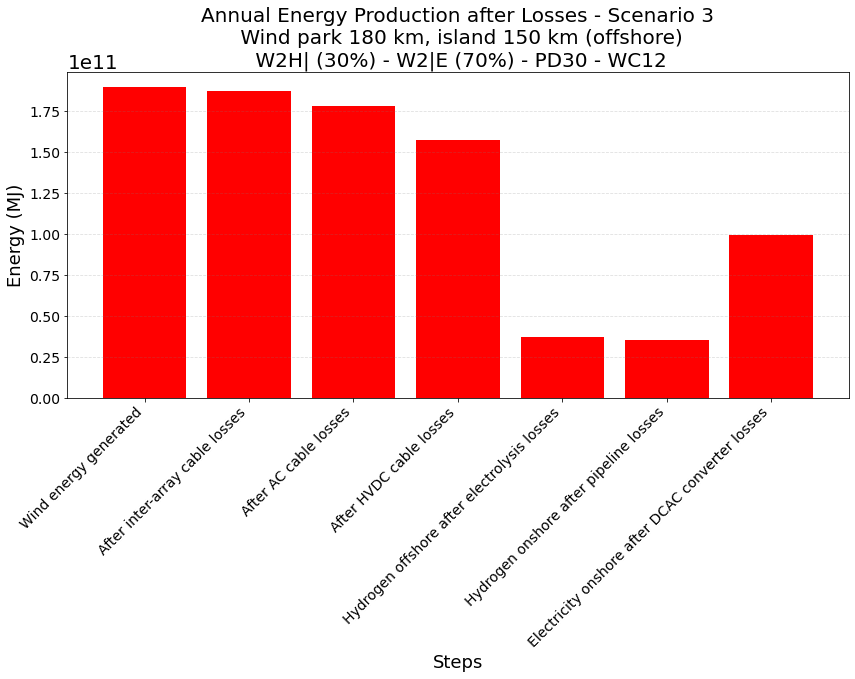

In [1034]:
import matplotlib.pyplot as plt

# Define data
x_labels = ['Wind energy generated', 'After inter-array cable losses', 'After AC cable losses', 'After HVDC cable losses', 'Hydrogen offshore after electrolysis losses', 'Hydrogen onshore after pipeline losses', 'Electricity onshore after DCAC converter losses']
y_values = [total_annual_wind_production, energy_after_inter_array, energy_after_DC, energy_after_HVDC, hydrogen_kg_MJ, hydrogen_onshore_MJ, electricity_energy_onshore]

# Plot bar chart
fig, ax = plt.subplots(figsize=(14, 6))
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.bar(x_labels, y_values, color='red')
ax.set_xlabel('Steps', fontsize = 18)
ax.set_xticklabels(x_labels, fontsize=14)
ax.set_ylabel('Energy (MJ)', fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Annual Energy Production after Losses - Scenario 3\n Wind park 180 km, island 150 km (offshore)\n W2H| (30%) - W2|E (70%) - PD30 - WC12', fontsize=20)
plt.xticks(rotation=45, ha='right')
    
plt.show()


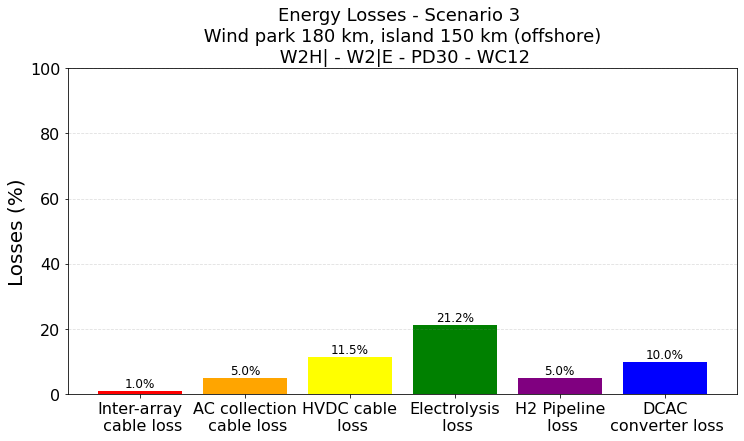

In [1035]:
import matplotlib.pyplot as plt

loss_inter_array = 100 - (energy_after_inter_array / total_annual_wind_production * 100)
loss_DC_collection = 100 - (energy_after_DC / energy_after_inter_array * 100)
loss_HVDC = 100 - (energy_after_HVDC / energy_after_DC * 100)
loss_electrolysis = 100 - (hydrogen_kg_MJ / total_electrolyser_energy_MJ * 100)
loss_pipeline = 100 - (hydrogen_onshore_MJ / hydrogen_kg_MJ * 100)
loss_DCAC_converter = 100 - (electricity_energy_onshore / (energy_after_HVDC*dedicated_DCAC_energy) * 100)

losses = [loss_inter_array, loss_DC_collection, loss_HVDC, loss_electrolysis, loss_pipeline, loss_DCAC_converter]
labels = ["Inter-array\n cable loss", "AC collection\n cable loss", "HVDC cable\n loss", "Electrolysis\n loss", "H2 Pipeline\n loss", "DCAC\n converter loss"]
colors = ["red", "orange", "yellow", "green", "purple", "blue"]

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, losses, color=colors)

for i, v in enumerate(losses):
    ax.text(i, v + 1, str(round(v, 1)) + "%", fontsize=12, ha='center')

ax.set_ylim(0, 100)
ax.set_ylabel("Losses (%)")
ax.set_title("Energy Losses - Scenario 3 \n Wind park 180 km, island 150 km (offshore) \n W2H| - W2|E - PD30 - WC12", fontsize=18)
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [1036]:
WACC = WACC

present_value_hydrogen = []
for i, production in enumerate(hydrogen_onshore_per_year):
    pv = production * (1 / ((1 + WACC) ** (startyear+i - escalation_base_year)))
    present_value_hydrogen.append(pv)
    
npv_hydrogen = sum(present_value_hydrogen)
print("Net Present Value hydrogen: {:.2f} kg".format(npv_hydrogen))

present_value_electricity = []
for i, production in enumerate(electricity_onshore_per_year):
    pv = production * (1 / ((1 + WACC) ** (startyear+i - escalation_base_year)))
    present_value_electricity.append(pv)
    
npv_electricity = sum(present_value_electricity)
print("Net Present Value electricity: {:.2f} kWh".format(npv_electricity))

present_value_electricity_after_hydrogen = []
for i, production in enumerate(electricity_after_hydrogen_per_year):
    pv = production * (1 / ((1 + WACC) ** (startyear+i - escalation_base_year)))
    present_value_electricity_after_hydrogen.append(pv)
    
npv_electricity_after_hydrogen = sum(present_value_electricity_after_hydrogen)
print("Net Present Value hydrogen converted to electricity onshore: {:.2f} kWh".format(npv_electricity_after_hydrogen))

Net Present Value hydrogen: 1933827275.34 kg
Net Present Value electricity: 213738804116.79 kWh
Net Present Value hydrogen converted to electricity onshore: 32198224134.45 kWh


In [1037]:
total_cost = final_npv_sum*-1            # EU

total_cost_hydrogen = data_hydrogen
print(total_cost_hydrogen)

total_cost_electricity = data_electricity

17821526077.126797


In [1038]:
LCOH = total_cost_hydrogen / npv_hydrogen
LCOH2 = total_cost_hydrogen / npv_electricity_after_hydrogen
LCOE = total_cost_electricity / npv_electricity

npv_hydrogen_energy_produced = npv_hydrogen * 141.800 #MJ / kg
npv_electricity_energy_produced = npv_electricity * 3.600 #MJ / kWh

LCOTE = total_cost / (npv_hydrogen_energy_produced + npv_electricity_energy_produced)

print('LCOH: {:.2f} EU/kg'.format(LCOH))

print('LCOH2: {:.2f} EU/kWh'.format(LCOH2))

print('LCOE: {:.4f} EU/kWh'.format(LCOE))

print('Levelised Cost of Total Energy (LCOTE): {:.2f} EU/MJ'.format(LCOTE))

LCOH: 9.22 EU/kg
LCOH2: 0.55 EU/kWh
LCOE: 0.1603 EU/kWh
Levelised Cost of Total Energy (LCOTE): 0.05 EU/MJ


In [1039]:
total_wind_energy_production = sum(total_wind_energy_production_per_year)

hydrogen_energy_produced = total_hydrogen_onshore * 141.8 #MJ / kg
electricity_energy_produced = total_electricity_onshore * 3.6 #MJ / kWh

electrical_energy_input = total_wind_energy_production * 3.6 #MJ / kWh

SupplyChain_efficiency = (hydrogen_energy_produced + electricity_energy_produced) / electrical_energy_input 

print('SupplyChain efficiency: {:.2f} %'.format(SupplyChain_efficiency*100))

SupplyChain efficiency: 71.13 %


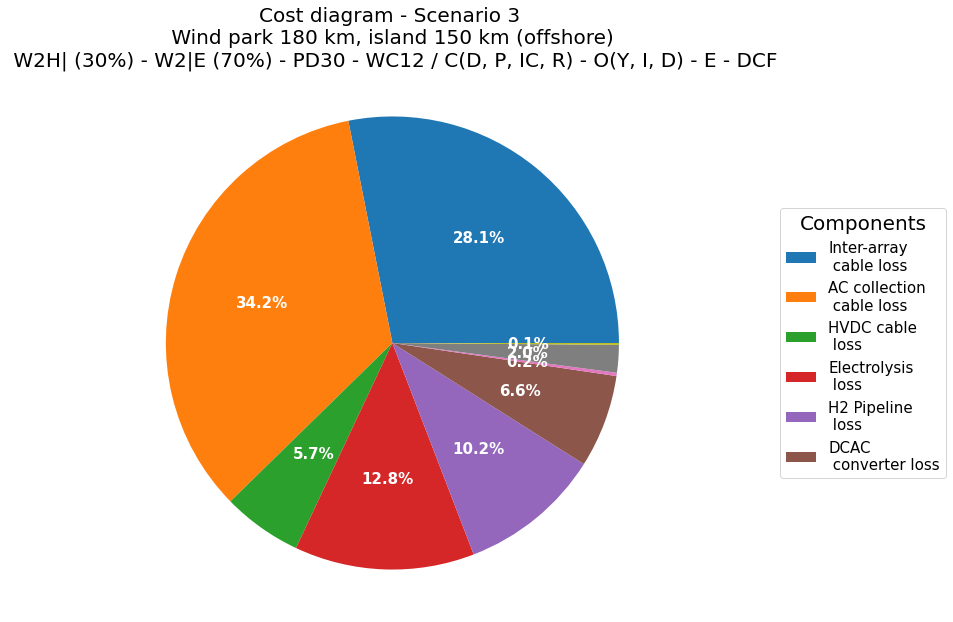

Total cost (NPV): 52.09 billion EUR
LCOH: 9.22 EUR / kg
LCOH2: 0.55 EUR / kWh
LCOE: 0.16 EUR / kWh
Levelised Cost of Total Energy (LCOTE): 0.05 EUR / MJ
Supply Chain efficiency: 71.13 %


In [1040]:
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    rounded_pct = round(pct, 2)
    if rounded_pct == 0:
        return ""
    return f"{rounded_pct:.1f}%"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), radius=total_cost/50_000_000_000)

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1.2, 0.5),
          fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

title = ax.set_title("Cost diagram - Scenario 3 \n Wind park 180 km, island 150 km (offshore) \n W2H| (30%) - W2|E (70%) - PD30 - WC12 / C(D, P, IC, R) - O(Y, I, D) - E - DCF", fontsize=20)

plt.show()

cost_in_billions = total_cost / 1_000_000_000
print(f"{BOLD}Total cost (NPV): {cost_in_billions:.2f} billion EUR")
print(f"LCOH: {LCOH:.2f} EUR / kg")
print(f"LCOH2: {LCOH2:.2f} EUR / kWh")
print(f"LCOE: {LCOE:.2f} EUR / kWh")
print('Levelised Cost of Total Energy (LCOTE): {:.2f} EUR / MJ'.format(LCOTE))
print('Supply Chain efficiency: {:.2f} %'.format(SupplyChain_efficiency*100))

##### 6 - Revenues

In [1041]:
# make df_combined again (only cashflows no npv yet)
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, HVDCCable2.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, H2Pipeline.df])

In [1042]:
# create a set of escalation years and values
escalation_years = []
escalation_values = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_years.append(year)    
    escalation_values.append(previous)

In [1043]:
# create list of revenue years
revenue_years = list(range(startyear, endyear+1))

# calculate revenues for both electricity and hydrogen
electricity_revenue_value_per_year = [energy * electricity_price for energy in electricity_onshore_per_year]
hydrogen_revenue_value_per_year = [energy * hydrogen_price for energy in hydrogen_onshore_per_year]

# create a list of the combined electricity and hydrogen revenue values (summed)
revenue_values = []
for e, h in zip(electricity_revenue_value_per_year, hydrogen_revenue_value_per_year):
    revenue_values.append(e + h)

# escalate the combined electricity and hydrogen revenue values
for i, revenue_year in enumerate(revenue_years):
            revenue_values[i] = revenue_values[i] * escalation_values[
                [index for index, escalation_year in enumerate(escalation_years) if
                 escalation_year == revenue_year][0]]

In [1044]:
# add the escalated combined electricity and hydrogen revenue values to df_combined
for i, revenue_year in enumerate(revenue_years):
    df_combined.loc[revenue_year, 'revenue'] = revenue_values[i]

In [1045]:
# calculate the npv values
df_combined_npv = calculate_npv(df_combined, 2030, WACC=WACC)

In [1046]:
import numpy_financial as npf

# Calculate the NPV of the cash flows
df_combined_npv = calculate_npv(df_combined, 2030, WACC=WACC)

# Extract the cash flows from the DataFrame and convert to a one-dimensional array
cash_flows = df_combined_npv['cashflow'].values

# Calculate the internal rate of return (IRR)
irr = npf.irr(cash_flows)

# Convert the IRR to a string with two decimal places
irr_str = "{:.2f}%".format(irr * 100)

# Print the IRR
print("Internal Rate of Return (IRR): {:.2%}".format(irr))

Internal Rate of Return (IRR): 12.88%


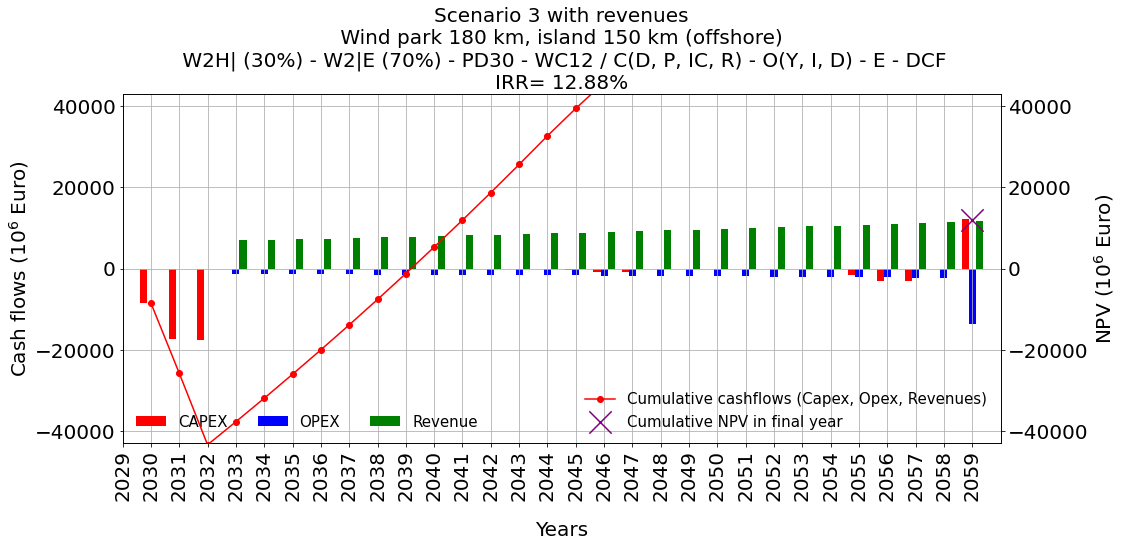

In [1047]:
# plot
create_npv_plot(df_combined_npv, title='Scenario 3 with revenues\n Wind park 180 km, island 150 km (offshore) \n W2H| (30%) - W2|E (70%) - PD30 - WC12 / C(D, P, IC, R) - O(Y, I, D) - E - DCF\nIRR= ' + irr_str )

In [1048]:
final_npv_sum_revenue = df_combined_npv['npv_sum'].iloc[-1]
print(final_npv_sum_revenue/1000000000)

11.89378212004947


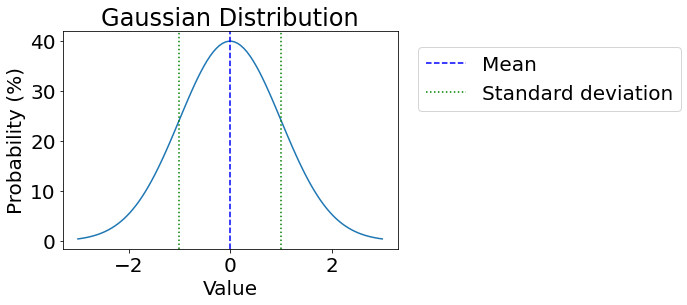

In [1049]:
import matplotlib.pyplot as plt
import numpy as np

# Define the distribution parameters
mu = 0 # mean
sigma = 1 # standard deviation

# Generate the distribution values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

# Convert y values to percentage
y_percent = y * 100

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y_percent)

# Add mean and standard deviation lines
ax.axvline(mu, linestyle='--', color='b', label='Mean')
ax.axvline(mu-sigma, linestyle=':', color='g', label='Standard deviation')
ax.axvline(mu+sigma, linestyle=':', color='g')

# Add legend and axis labels
plt.xlabel('Value')
plt.ylabel('Probability (%)')
plt.title('Gaussian Distribution')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), borderaxespad=1)

# Show the plot
plt.show()
